In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [75]:
df = pd.read_csv('fer2013.csv')
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [76]:
df.groupby('Usage').count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [77]:
df.groupby('emotion').count()

,pixels,Usage
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


In [78]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
df = df.rename(columns={"emotion":"label"})
df['emotion'] = df['label'].apply(lambda x: emotions[int(x)])
print(df.shape)
df.head(5)

(35887, 4)


,label,pixels,Usage,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral


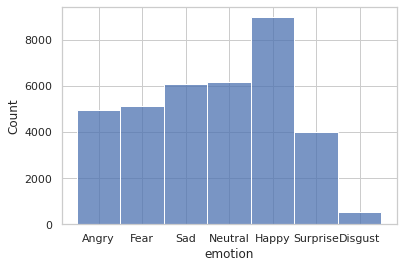

In [79]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.histplot(x="emotion", data=df)
sns.reset_orig()

Sad


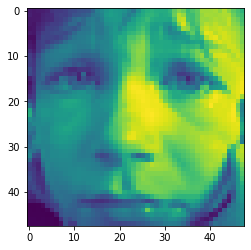

In [80]:
id = 6
image = np.reshape(np.array(df.pixels[id].split(' ')).astype(int),(48,48))
plt.imshow(image)
print(df.emotion[id])

Happy


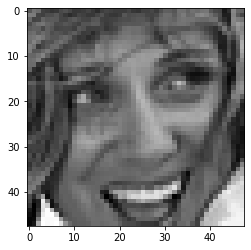

In [81]:
id = 32
image = np.reshape(np.array(df.pixels[id].split(' ')).astype(int),(48,48))
plt.imshow(image,cmap=plt.cm.gray)
print(df.emotion[id])

In [82]:
train = df[df.Usage == 'Training']
test_private = df[df.Usage == 'PrivateTest']
test_public = df[df.Usage == 'PublicTest']

In [162]:
def createNpyFile(data, dataFileName, labelFileName):
    pixels = data['pixels']
    labels =data['label']
    
    pix_list = pixels.tolist()
    pixels = np.array([np.fromstring(x, dtype=int, sep=' ') for x in pix_list])
    pixels = np.reshape(pixels, (-1, 48, 48))
    with open(dataFileName, 'wb') as f:
        np.save(f, pixels)

    lab_list = labels.tolist()
    labels = np.asarray(lab_list)

    with open(labelFileName, 'wb') as f:
        np.save(f, labels)

In [163]:
createNpyFile(train, 'pixels_train.npy', 'labels_train.npy')
createNpyFile(test_private, 'pixels_privateTest.npy', 'labels_priaveTest.npy')
createNpyFile(test_public, 'pixels_publicTest.npy', 'labels_publicTest.npy')